# This is a test file notebook for the image processing functions.

# 1. Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageprocessing as ip

- Import test image

In [2]:
image = cv2.imread('images/test images/Road.jpg')
if image is None:
    raise ValueError("Image not found. Please check the path.")
else :
    print("Image loaded successfully.")

Image loaded successfully.


# 2. Test Geometric Transformations Functions

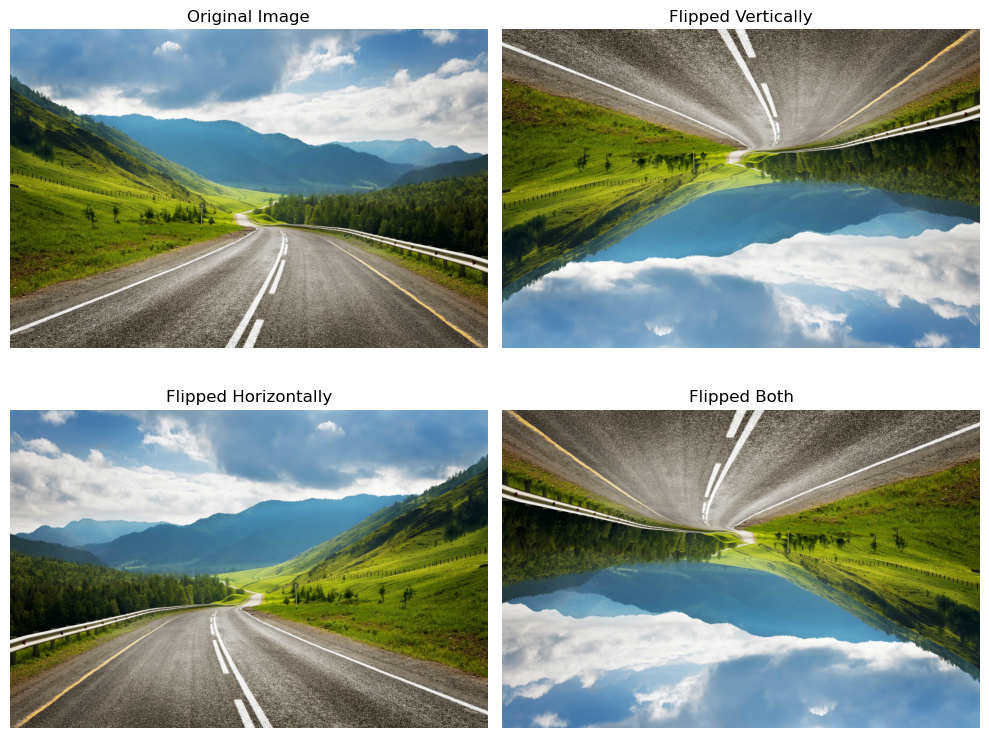

In [3]:
# Flipping image
flipped_image_0 = ip.flip_image(image, 0)
flipped_image_1 = ip.flip_image(image, 1)
flipped_image_both = ip.flip_image(image, -1)

# Displaying results
image_titles = ['Original Image', 'Flipped Vertically', 'Flipped Horizontally', 'Flipped Both']
images = [image, flipped_image_0, flipped_image_1, flipped_image_both]
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(image_titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

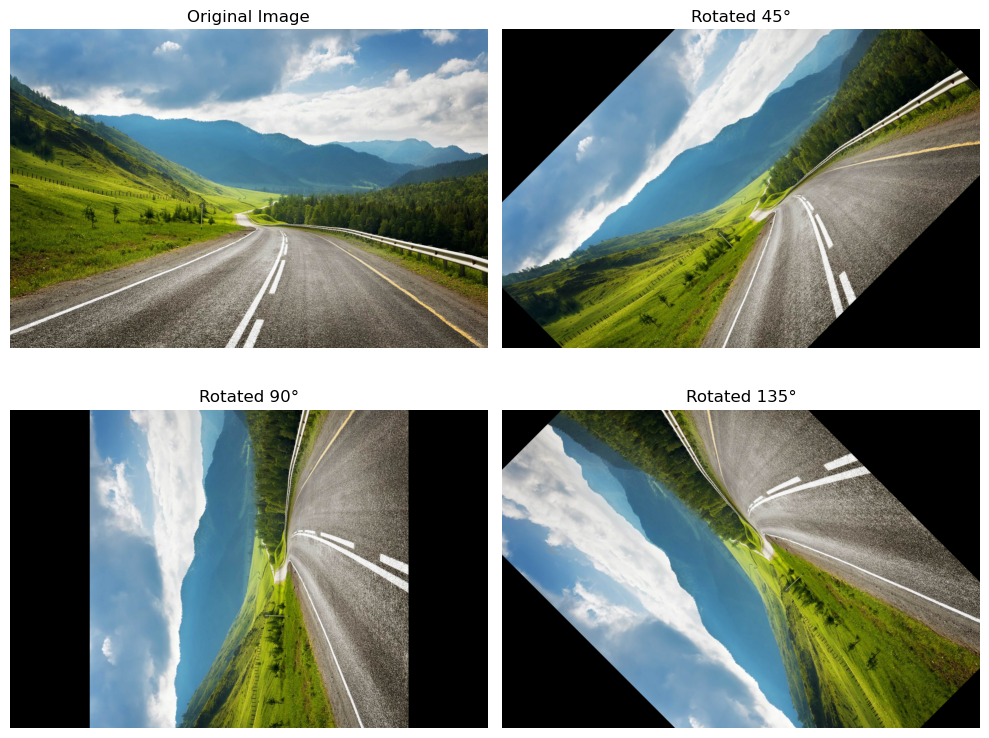

In [4]:
rotated_image_45 = ip.rotate_image(image, 45)
rotated_image_90 = ip.rotate_image(image, 90)
rotated_image_135 = ip.rotate_image(image, 135)

# Displaying results
image_titles = ['Original Image', 'Rotated 45°', 'Rotated 90°', 'Rotated 135°']
images = [image, rotated_image_45, rotated_image_90, rotated_image_135]
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(image_titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

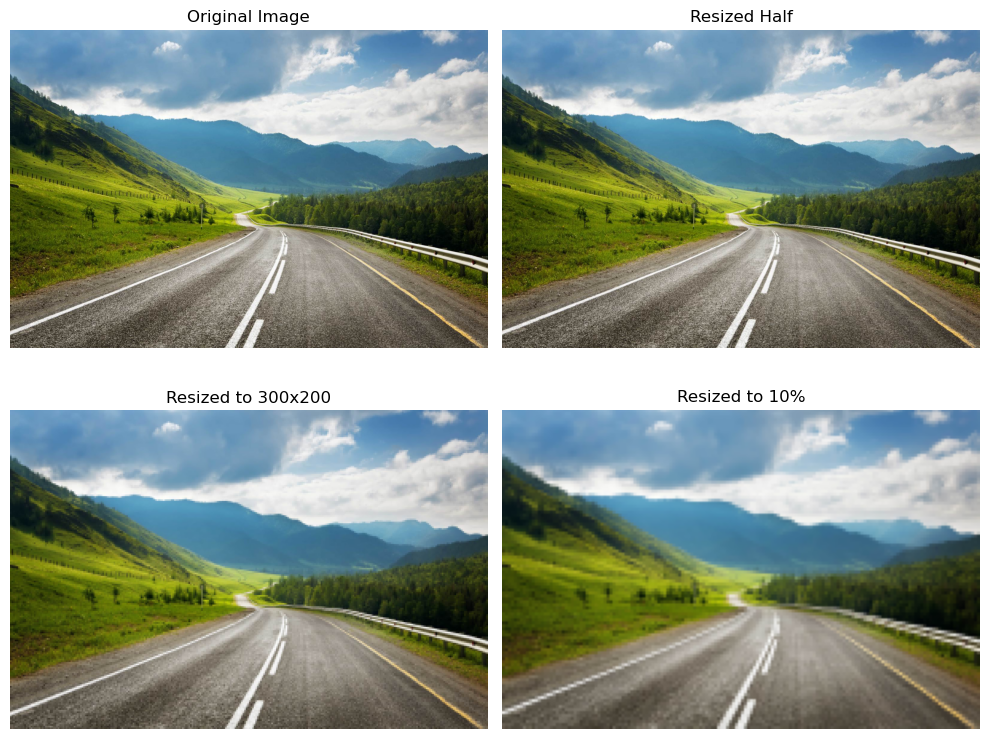

In [5]:
resized_image_half = ip.resize_image(image, fx=0.5, fy=0.5)
resized_image_pixes = ip.resize_image(image, width=300, height=200)
resized_image_fx = ip.resize_image(image, fx=0.1, fy=0.1)

# Displaying results
plt.figure(figsize=(10, 8))
image_titles = ['Original Image', 'Resized Half', 'Resized to 300x200', 'Resized to 10%']
images = [image, resized_image_half, resized_image_pixes, resized_image_fx]
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(image_titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


# 3. Testing blur and filters

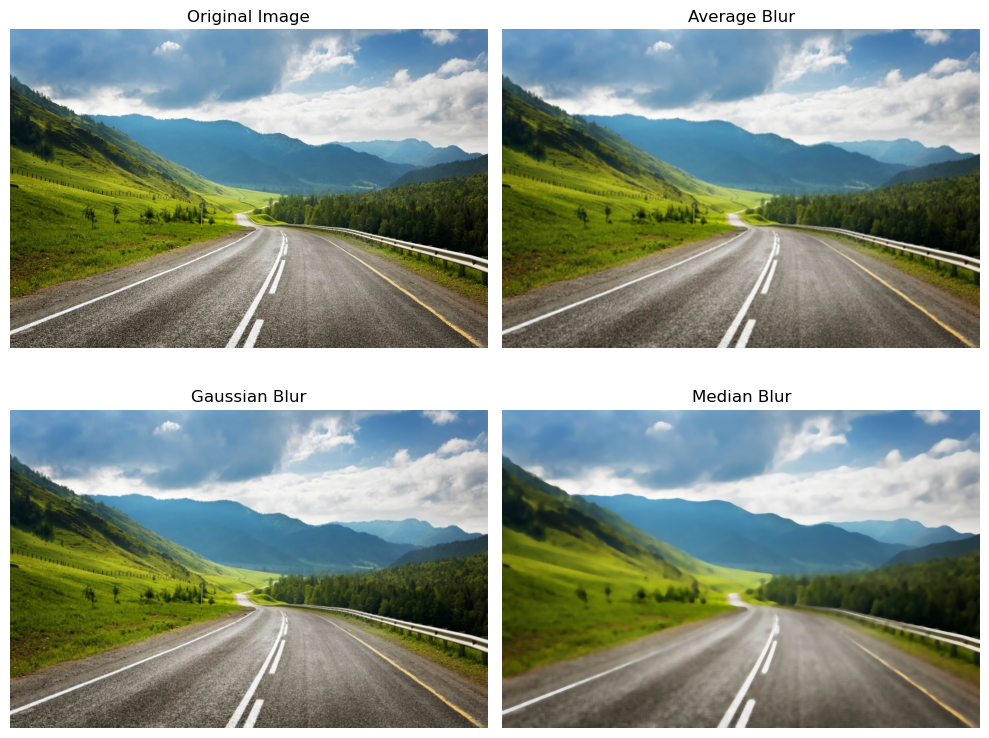

In [6]:
image_norm_blur = ip.average_blur(image, (5, 5))
image_gaussian_blur = ip.apply_gaussian_blur(image, (5, 5), 0)
image_median_blur = ip.apply_median_blur(image, 15)

# Display Results
image_titles = ['Original Image', 'Average Blur', 'Gaussian Blur', 'Median Blur']
images = [image, image_norm_blur, image_gaussian_blur, image_median_blur]
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(image_titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

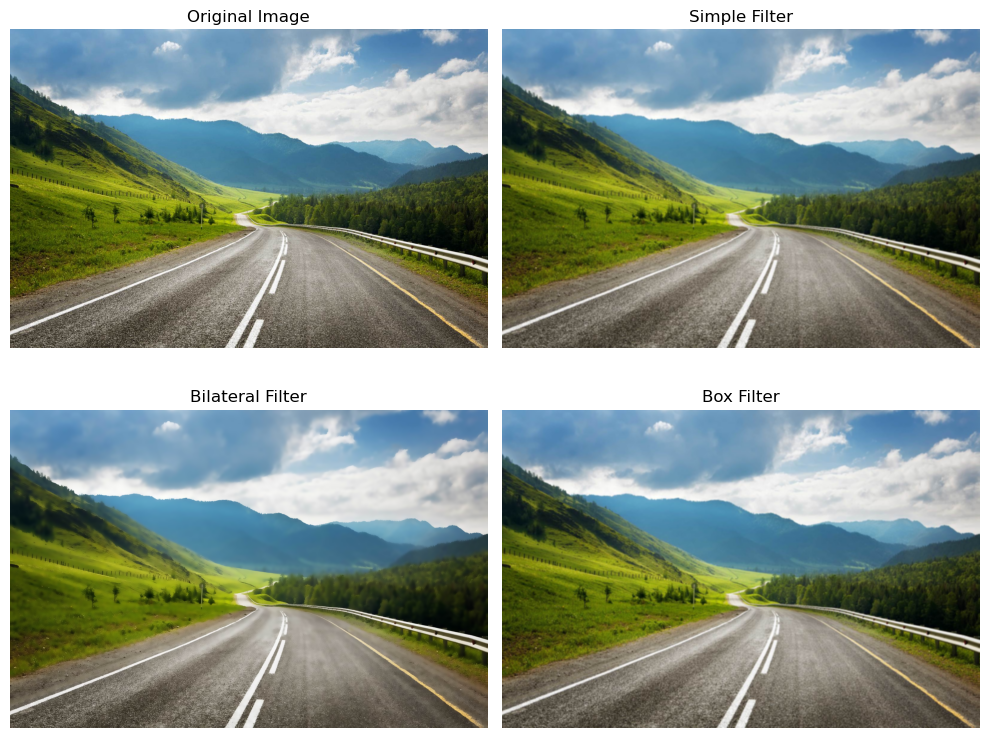

In [7]:
image_simple_filter = ip.simple_filter(image, (5, 5))
image_bilateral_filter = ip.bilateral_filter(image, 15, 75, 75)
image_box_filter = ip.box_filter(image, ddepth_val=-1, k_size=(5, 5))

# Display Results
image_titles = ['Original Image', 'Simple Filter', 'Bilateral Filter', 'Box Filter']
images = [image, image_simple_filter, image_bilateral_filter, image_box_filter]
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(image_titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 4. Testing Histogram plotting and equalization

In [8]:
image_notes = cv2.imread('images/test images/math notes.jpg')
if image_notes is None:
    raise ValueError("Image not found. Please check the path.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


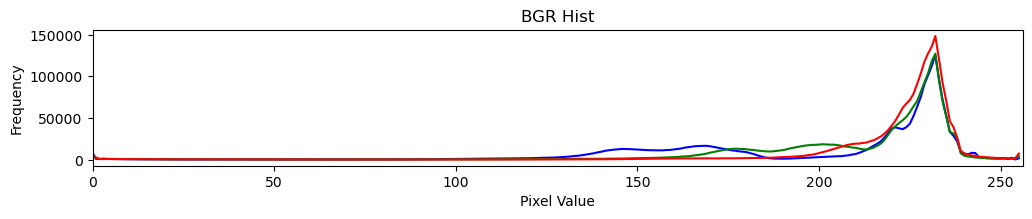

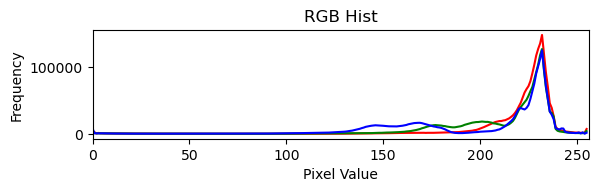

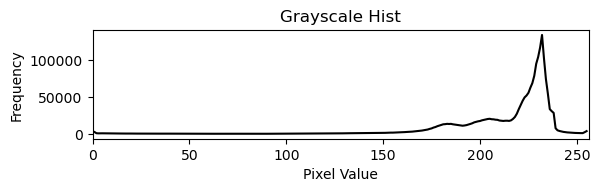

In [9]:
image_titles = ['BGR Hist', 'RGB Hist', 'Grayscale Hist']
image_RGB = cv2.cvtColor(image_notes, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_notes, cv2.COLOR_BGR2GRAY)
images = [image_notes, image_RGB, image_gray]

plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    ip.plot_histogram(images[i], i, image_titles[i], 'Pixel Value', 'Frequency')

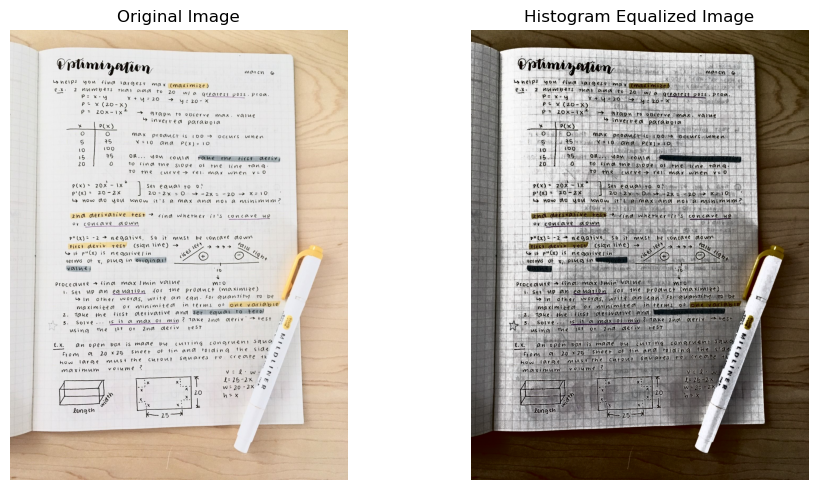

In [10]:
eq_image = ip.equalize_color_histogram(image_notes)
image_titles = ['Original Image', 'Histogram Equalized Image']
images = [image_notes, eq_image]

plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(image_titles[i])
    plt.axis('off')
plt.tight_layout()

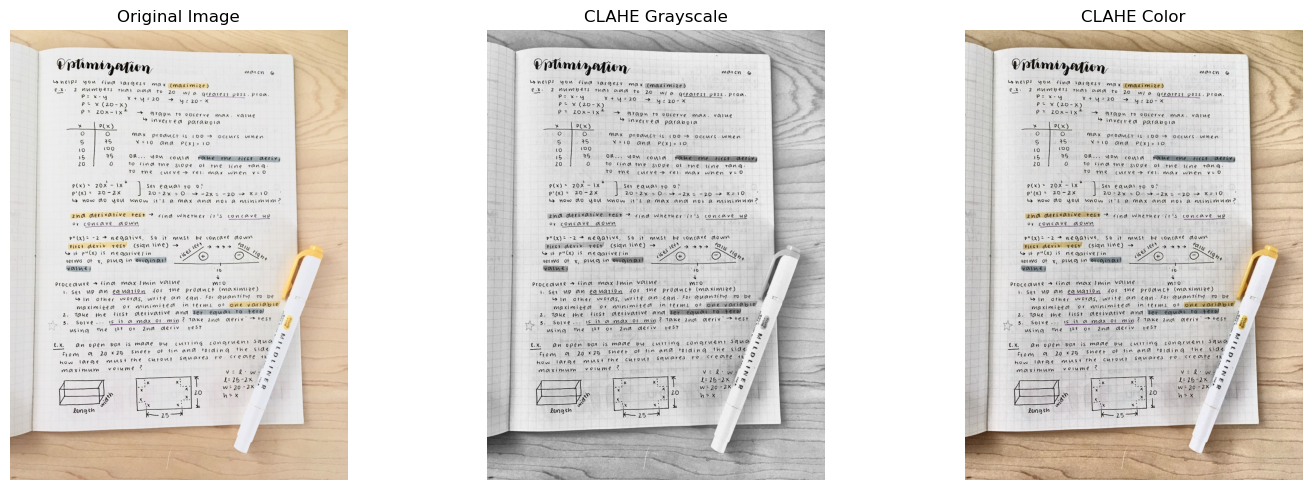

In [11]:
org_img = image_notes.copy()
eq_image_clahe = ip.apply_clahe_grayscale(image_notes, clip_limit=2.0, tile_grid_size=(8, 8))
eq_image_color_clahe = ip.apply_clahe_color(image_notes, clip_limit=2.0, tile_grid_size=(8, 8))

# Display Results:
img_titles = ['Original Image', 'CLAHE Grayscale', 'CLAHE Color']
imgs = [org_img, eq_image_clahe, eq_image_color_clahe]
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    plt.title(img_titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 5. Testing Edge Detection Functions

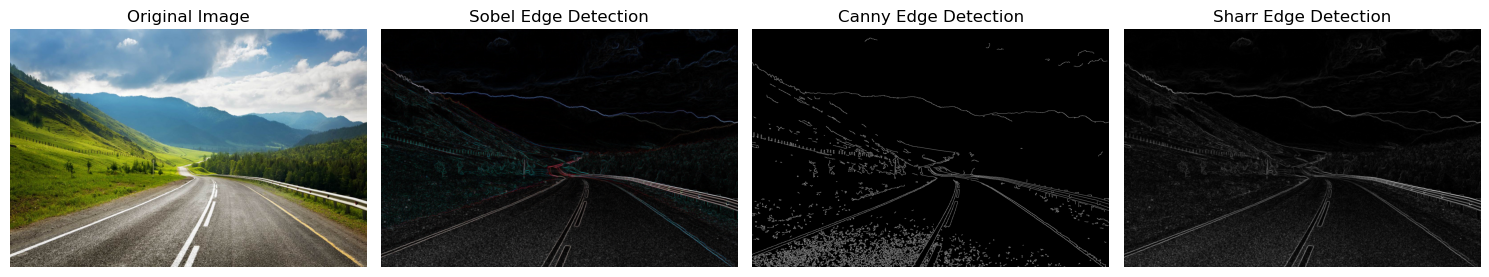

In [12]:
no_edge_image = image.copy()

# Apply Blur first
no_edge_image_blurred = ip.apply_gaussian_blur(no_edge_image, (5, 5), 0)

# Apply Edge Detection
edges_sobel = ip.sobel_edge_detection(no_edge_image_blurred, 3)
edges_canny = ip.canny_edge_detection(no_edge_image_blurred, 100, 200)
edges_sharr = ip.scharr_edge_detection(no_edge_image_blurred)

# Display Results
image_titles = ['Original Image', 'Sobel Edge Detection', 'Canny Edge Detection', 'Sharr Edge Detection']
images = [no_edge_image, edges_sobel, edges_canny, edges_sharr]
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    if i == 0:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(image_titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 6. Testing Thresholding Functions

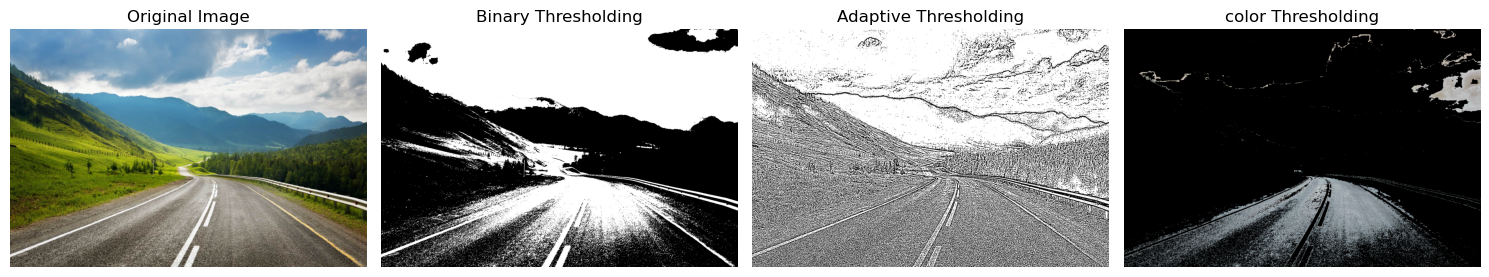

In [17]:
binary_image = ip.binary_thresholding(image, 127, 255, cv2.THRESH_BINARY)
adaptive_thres_image = ip.adaptive_thresholding(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Get gray color thresholds
lower_road = np.array([0, 0, 50])    
upper_road = np.array([180, 40, 200])

color_thresh_image = ip.color_thresholding(image, lower_road, upper_road, num_of_thresholds=1)

# Display Results
image_titles = ['Original Image', 'Binary Thresholding', 'Adaptive Thresholding', 'color Thresholding']
images = [image, binary_image, adaptive_thres_image, color_thresh_image]
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    if i == 0:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(image_titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()